# Introduction

[Cylc](https://cylc.github.io/cylc/) is a workflow engine, written in Python, and used by [NIWA](https://niwa.co.nz), [MetOffice](http://www.metoffice.gov.uk/) and others. It handles continuous workflows of cycling tasks. We will learn more about cylc, how it can be used, its features and more on this notebook.

## Installation

The cylc software can be obtained from [GitHub](https://github.com/cylc/). The [installation instructions](https://github.com/cylc/cylc/blob/master/INSTALL.md) are easy to follow and should work on most Linux distributions. 

You will need a computer with Linux and Python 2.x, where you can also install other software and libraries such as Jinja2 and graphviz.

There is also a [section in the FAQ](https://cylc.github.io/cylc/faq.html#how-do-i-install-cylc) that covers how to install cylc.

You can check the cylc installation by running the following command.

In [ ]:
!cylc check-software

It is recommended that you fix any warnings before proceeding with the rest of this notebook.

## A Cycling Workflow Example

The following example is intended to convey something of cylc’s basic functionality. However, it barely scratches the surface; to understand more, read the [User Guide](https://cylc.github.io/cylc/documentation.html#the-cylc-user-guide).

We will register a suite in cylc, called my.suite. But before registering the suite, we will trigger the command to unregister any suite with the same name. That way you can also run this notebook multiple times with no error.

In [1]:
!cylc unregister my.suite

0 suite(s) unregistered.


As you may have noticed, the command says how many test suites were unregistered. Now we can register the suite.

In [6]:
!cylc register my.suite $PWD/../data/cycling-workflow-example-suite/

REGISTER my.suite: /home/kinoshitabd/Development/python/workspace/cylc-notebook/notebooks/../data/cycling-workflow-example-suite


Again, the command will give clear indication of whether the suite was successfully registered or not, and will also indicate the location of the new suite. Let's print some information about our suite.

In [ ]:
!cylc db print my.suite

You can edit the suite with the command `cylc edit my.suite`.

Before running the suite, let's check if it is valid, and take a look at a grap of our suite.

In [8]:
!cylc validate my.suite

Valid for cylc-6.10.2


And we can also visualize our suite as a graph.


** (process:27783): WARNING **: Trying to register gtype 'GMountMountFlags' as enum when in fact it is of type 'GFlags'

** (process:27783): WARNING **: Trying to register gtype 'GDriveStartFlags' as enum when in fact it is of type 'GFlags'

** (process:27783): WARNING **: Trying to register gtype 'GSocketMsgFlags' as enum when in fact it is of type 'GFlags'


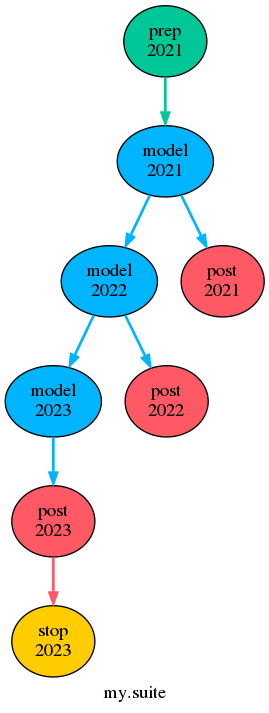

In [9]:
# remove any existing image
!rm -f mysuite.png
# plot suite
!cylc graph my.suite --output-file mysuite.png
# embed into the notebook
from IPython.display import Image
Image(filename='mysuite.png')

Finally, to run the suite, we can submit it from the command line with the following command.

In [12]:
!cylc run my.suite

ERROR: port file exists: /home/kinoshitabd/.cylc/ports/my.suite

If my.suite is not running, delete the port file and try again.  If it is
running but not responsive, kill any left over suite processes too.

To see if 'my.suite' is running on 'niwa-1010086.niwa.local:7766':
 * cylc scan -n '\bmy.suite\b' niwa-1010086.niwa.local
 * cylc ping -v --host=niwa-1010086.niwa.local my.suite
 * ssh niwa-1010086.niwa.local "pgrep -a -P 1 -fu $USER 'cylc-r.* \bmy.suite\b'"

'ERROR, port file exists: /home/kinoshitabd/.cylc/ports/my.suite'


And to get the job output, it is just a matter of running one more command.

In [15]:
!cylc log -o my.suite model.2021

JOB SCRIPT STARTING
cylc Suite and Task Identity:
  Suite Name  : my.suite
  Suite Host  : niwa-1010086.niwa.local
  Suite Port  : 7766
  Suite Owner : kinoshitabd
  Task ID     : model.2021
  Task Host   : niwa-1010086.niwa.local
  Task Owner  : kinoshitabd
  Task Submit No.: 1
  Task Try No.: 1

my FOOD is icecream
cylc (scheduler - 2016-09-06T13:26:11+12): started at 2016-09-06T13:26:11+12
cylc (scheduler - 2016-09-06T13:26:21+12): succeeded at 2016-09-06T13:26:21+12
JOB SCRIPT EXITING (TASK SUCCEEDED)


That's it. This was a short introduction to cylc, with a simple working example. For more, please go to the [cylc website](https://cylc.github.io/cylc/), or check the [User Guide](https://cylc.github.io/cylc/documentation.html#the-cylc-user-guide).

Happy cycling!